In [4]:
!pip install torch

In [21]:
from tqdm import tqdm
import numpy as np

import torch
from torch import nn
from torch import tensor
from torch import optim

import matplotlib.pyplot as plt

torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'


# XOR gate inputs and outputs.
X = xor_input = tensor([[0,0], [0,1], [1,0], [1,1]]).float().to(device)
Y = xor_output = tensor([[0],[1],[1],[0]]).float().to(device)

# Use tensor.shape to get the shape of the matrix/tensor.
num_data, input_dim = X.shape
print('Inputs Dim:', input_dim) # i.e. n=2 

num_data, output_dim = Y.shape
print('Output Dim:', output_dim) 
print('No. of Data:', num_data) # i.e. n=4
print(Y)

Inputs Dim: 2
Output Dim: 1
No. of Data: 4
tensor([[0.],
        [1.],
        [1.],
        [0.]], device='cuda:0')


In [ ]:

import pandas as pd

news=pd.read_csv('transfusion.data.csv')
news.head()
a = news.groupby("Potential_donator")
print(a.head())
print(a.describe())
print(news[0])




In [ ]:
X_Data = news[['Recency','Frequency','Total','Months_since_last']].values
y_Data = news[['Potential_donator']].values

X = torch.from_numpy(X_Data).float().to(device)
Y = torch.from_numpy(y_Data).float().to(device)

# Use tensor.shape to get the shape of the matrix/tensor.
num_data, input_dim = X.shape
print('Inputs Dim:', input_dim) # i.e. n=2 

num_data, output_dim = Y.shape
print('Output Dim:', output_dim) 
print('No. of Data:', num_data) # i.e. n=4

print(Y)

100%|██████████| 50/50 [00:00<00:00, 763.49it/s]


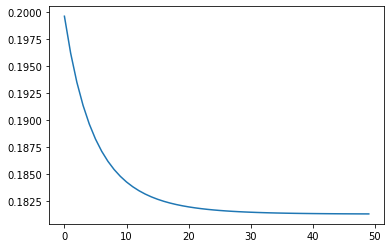

In [25]:
# Step 1: Initialization. 

# Initialize the model.
# Set the hidden dimension size.
hidden_dim = 10
# Use Sequential to define a simple feed-forward network.
model = nn.Sequential(
            # Use nn.Linear to get our simple perceptron.
            nn.Linear(input_dim, hidden_dim),
            # Use nn.Sigmoid to get our sigmoid non-linearity.
            nn.Sigmoid(),
            # Second layer neurons.
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        ).to(device)

# Initialize the optimizer
learning_rate = 0.3
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Initialize the loss function.
criterion = nn.MSELoss()

# Initialize the stopping criteria
# For simplicity, just stop training after certain no. of epochs.
num_epochs = 50

losses = [] # Keeps track of the loses.

# Step 2-4 of training routine.

for _e in tqdm(range(num_epochs)):
    # Reset the gradient after every epoch. 
    optimizer.zero_grad() 
    # Step 2: Foward Propagation
    predictions = model(X)
    
    # Step 3: Back Propagation 
    # Calculate the cost between the predictions and the truth.
    loss = criterion(predictions, Y)
    # Remember to back propagate the loss you've computed above.
    loss.backward()
    
    # Step 4: Optimizer take a step and update the weights.
    optimizer.step()
    
    # Log the loss value as we proceed through the epochs.
    losses.append(loss.data.item())
    

plt.plot(losses)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


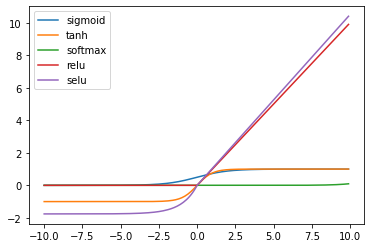

In [5]:
import torch
from torch import nn

x = torch.tensor(np.arange(-10, 10, 0.1))

# See https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity 
a1 = nn.Sigmoid()
a2 = nn.Tanh()    # Fill in the tanh function.
a3 = nn.Softmax() # Fill in the softmax function.
a4 = nn.ReLU()    # Fill-in the RELU func.
a5 = nn.SELU()    # Fill in the SELU func.

# pyplot only accepts numpy arrays...
# Pardon the laziness
y1 = a1(x).numpy() 
y2 = a2(x).numpy() 
y3 = a3(x).numpy() 
y4 = a4(x).numpy() 
y5 = a5(x).numpy()
x = x.numpy()

plt.plot(x,y1, label='sigmoid')
plt.plot(x,y2, label='tanh')
plt.plot(x,y3, label='softmax')
plt.plot(x,y4, label='relu')
plt.plot(x,y5, label='selu')
plt.legend(loc='upper left')
plt.show()